In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

from mle_toolbox.utils import load_log, hyper_log_to_df

# Load in Meta-Log .hdf5 file storing all individual runs

In [2]:
# Load log and get overview of different logged runs
meta_log = load_log("experiments/meta_log.hdf5")
list(meta_log.b_1_eval_3.time.keys())

['step_counter', 'time_elapsed']

In [3]:
# And here are the different items stored in the log
print("Outer level:", meta_log.b_1_eval_0.keys())
print("Meta level:", meta_log.b_1_eval_0.meta.keys())
print("Time level:", meta_log.b_1_eval_0.time.keys())
print("Stats level:", meta_log.b_1_eval_0.stats.keys())

Outer level: odict_keys(['meta', 'stats', 'time'])
Meta level: odict_keys(['config_fname', 'eval_id', 'experiment_dir', 'log_paths', 'network_ckpt', 'seeds'])
Time level: odict_keys(['step_counter', 'time_elapsed'])
Stats level: odict_keys(['integral', 'noise'])


In [4]:
# The meta data stores all the data relevant for recovering parts of the experiment
meta_log.b_1_eval_0.meta.network_ckpt

array(['experiments/21-02-13_b_1_eval_0/networks/21-02-13_b_1_eval_0_seed_13311.pt',
       'experiments/21-02-13_b_1_eval_0/networks/21-02-13_b_1_eval_0_seed_973722.pt'],
      dtype='<U200')

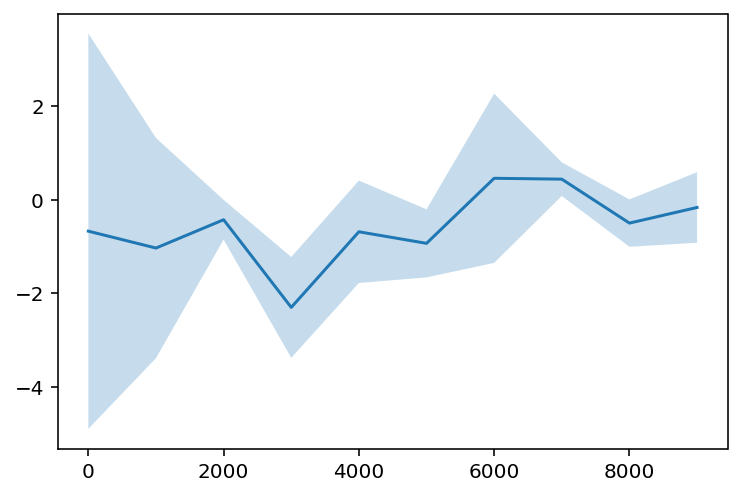

In [5]:
# If you want to get access to a specific variable just index it!
import matplotlib.pyplot as plt
plt.plot(meta_log.b_1_eval_0.time.step_counter.mean,
         meta_log.b_1_eval_0.stats.noise.mean)
plt.fill_between(meta_log.b_1_eval_0.time.step_counter.mean,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 - 2 * meta_log.b_1_eval_0.stats.noise.std,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 + 2 * meta_log.b_1_eval_0.stats.noise.std,
                 alpha=0.25)

# Visualize a Time Series/Learning Curve

/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


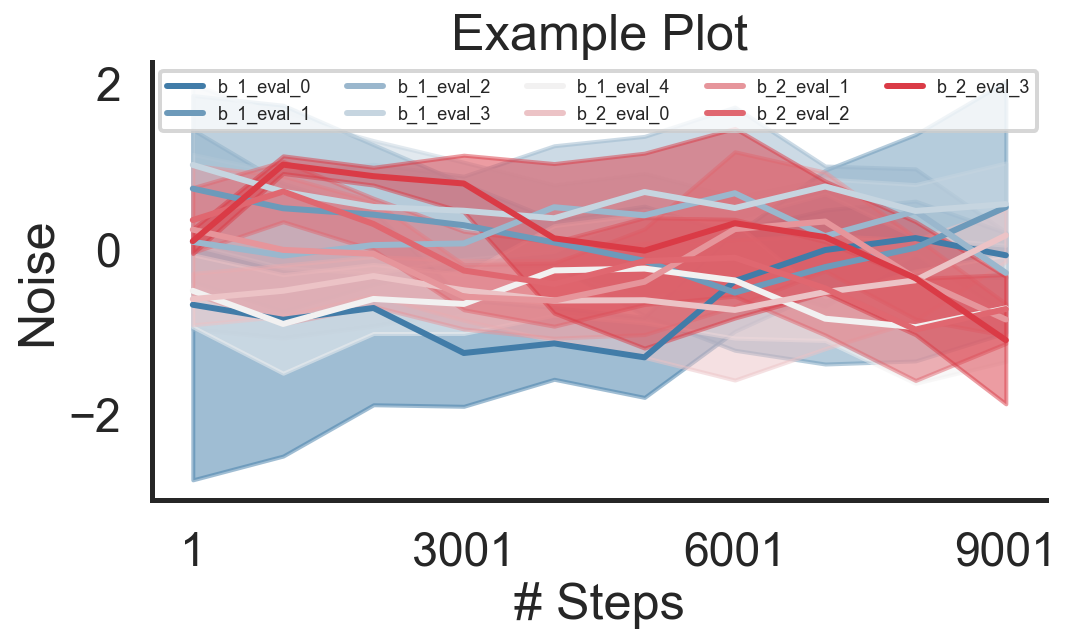

In [6]:
from mle_toolbox.visualize import visualize_1D_lcurves

fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="step_counter",
                               target_to_plot="noise",
                               smooth_window=3,
                               plot_title= "Example Plot",
                               xy_labels = [r"# Steps",
                                            r"Noise"],
                               base_label=r"{}",
                               curve_labels=[],
                               every_nth_tick= 3,
                               plot_std_bar= True)
ax.legend(ncol=5, fontsize=9)

# Load in Hyper-DF .pkl file 
## Stores all the hyperparameters of runs and more details

In [7]:
hyper_df = hyper_log_to_df("experiments/hyper_log.pkl")
hyper_df.columns

Index(['noise_mean', 'x_0', 'time_elapsed', 'run_id', 'integral', 'noise',
       'log_paths', 'experiment_dir', 'config_fname', 'network_ckpt', 'seeds',
       'log_fname'],
      dtype='object')

In [8]:
hyper_df.log_paths.iloc[0]

array(['experiments/21-02-13_b_1_eval_0/logs/21-02-13_b_1_eval_0_seed_13311.hdf5',
       'experiments/21-02-13_b_1_eval_0/logs/21-02-13_b_1_eval_0_seed_973722.hdf5'],
      dtype='<U200')

In [9]:
# Take a lookilooki - You can easily access checkpoints/individual logs 
# from the hyper_df
hyper_df

,noise_mean,x_0,time_elapsed,run_id,integral,noise,log_paths,experiment_dir,config_fname,network_ckpt,seeds,log_fname
0,0.000,1.0,12.378010,b_1_eval_0,0.018106,-0.167036,[experiments/21-02-13_b_1_eval_0/logs/21-02-13...,experiments/21-02-13_b_1_eval_0/,experiments/21-02-13_b_1_eval_0/21-02-13_b_1_e...,[experiments/21-02-13_b_1_eval_0/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_1_eval_0/logs/b_1_eval_...
1,0.000,5.5,12.378010,b_1_eval_1,0.064379,0.664615,[experiments/21-02-13_b_1_eval_1/logs/21-02-13...,experiments/21-02-13_b_1_eval_1/,experiments/21-02-13_b_1_eval_1/21-02-13_b_1_e...,[experiments/21-02-13_b_1_eval_1/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_1_eval_1/logs/b_1_eval_...
2,0.000,10.0,12.378010,b_1_eval_2,-0.020039,-1.290587,[experiments/21-02-13_b_1_eval_2/logs/21-02-13...,experiments/21-02-13_b_1_eval_2/,experiments/21-02-13_b_1_eval_2/21-02-13_b_1_e...,[experiments/21-02-13_b_1_eval_2/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_1_eval_2/logs/b_1_eval_...
3,0.005,1.0,12.378010,b_1_eval_3,0.071364,0.545196,[experiments/21-02-13_b_1_eval_3/logs/21-02-13...,experiments/21-02-13_b_1_eval_3/,experiments/21-02-13_b_1_eval_3/21-02-13_b_1_e...,[experiments/21-02-13_b_1_eval_3/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_1_eval_3/logs/b_1_eval_...
4,0.005,5.5,12.378010,b_1_eval_4,0.060121,-0.437384,[experiments/21-02-13_b_1_eval_4/logs/21-02-13...,experiments/21-02-13_b_1_eval_4/,experiments/21-02-13_b_1_eval_4/21-02-13_b_1_e...,[experiments/21-02-13_b_1_eval_4/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_1_eval_4/logs/b_1_eval_...
5,0.005,10.0,10.732396,b_2_eval_0,0.070339,0.153680,[experiments/21-02-13_b_2_eval_0/logs/21-02-13...,experiments/21-02-13_b_2_eval_0/,experiments/21-02-13_b_2_eval_0/21-02-13_b_2_e...,[experiments/21-02-13_b_2_eval_0/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_2_eval_0/logs/b_2_eval_...
6,0.010,1.0,10.732396,b_2_eval_1,0.149286,-0.908788,[experiments/21-02-13_b_2_eval_1/logs/21-02-13...,experiments/21-02-13_b_2_eval_1/,experiments/21-02-13_b_2_eval_1/21-02-13_b_2_e...,[experiments/21-02-13_b_2_eval_1/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_2_eval_1/logs/b_2_eval_...
7,0.010,5.5,10.732396,b_2_eval_2,0.126867,-0.468489,[experiments/21-02-13_b_2_eval_2/logs/21-02-13...,experiments/21-02-13_b_2_eval_2/,experiments/21-02-13_b_2_eval_2/21-02-13_b_2_e...,[experiments/21-02-13_b_2_eval_2/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_2_eval_2/logs/b_2_eval_...
8,0.010,10.0,10.732396,b_2_eval_3,0.118951,-1.425499,[experiments/21-02-13_b_2_eval_3/logs/21-02-13...,experiments/21-02-13_b_2_eval_3/,experiments/21-02-13_b_2_eval_3/21-02-13_b_2_e...,[experiments/21-02-13_b_2_eval_3/networks/21-0...,"[13311, 973722]",experiments/21-02-13_b_2_eval_3/logs/b_2_eval_...


# Plot 2D Heatmap of tracked variable

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec5db79160>)

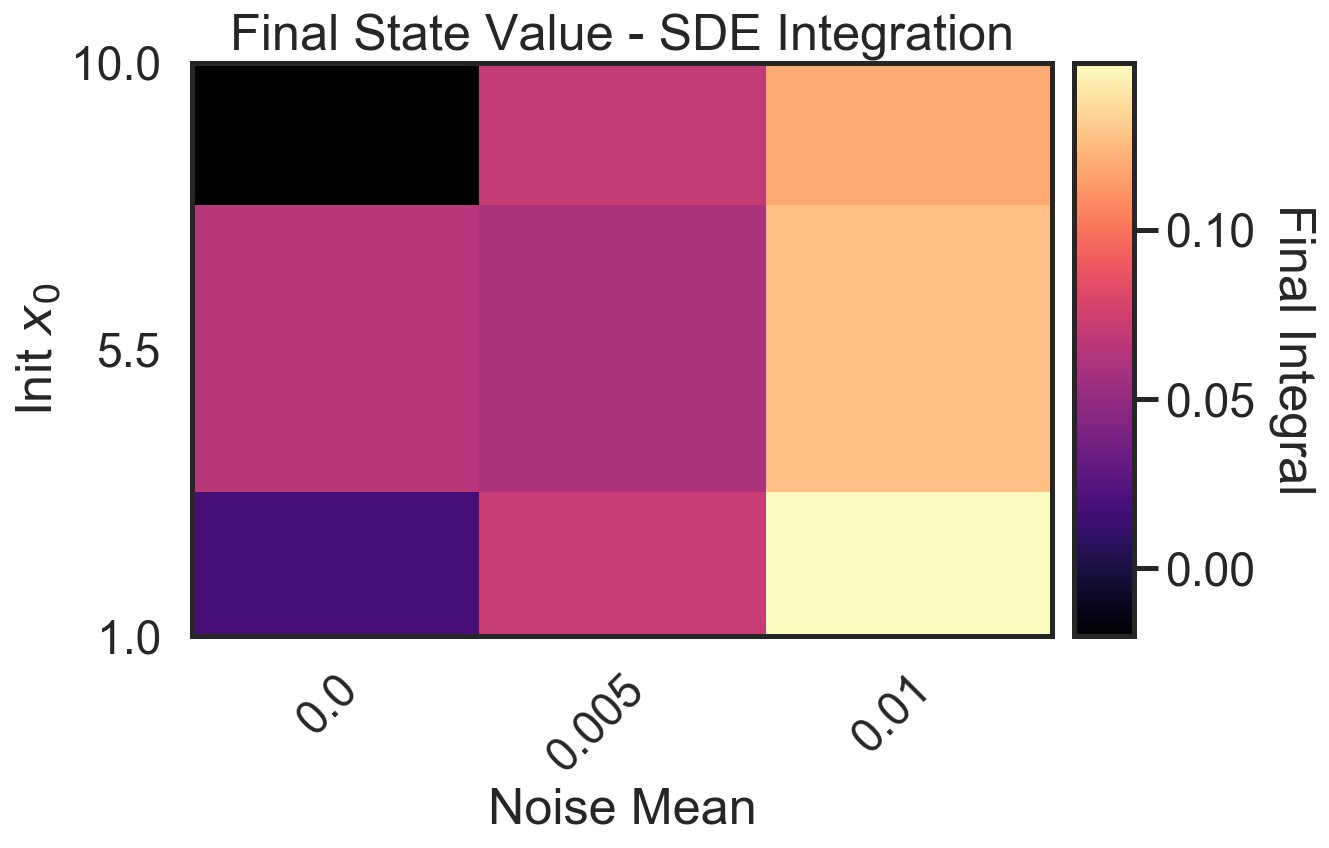

In [10]:
from mle_toolbox.visualize import visualize_2D_grid
fixed_params = None
params_to_plot = ["noise_mean", "x_0"]
target_to_plot = "integral"
visualize_2D_grid(hyper_df, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Final State Value - SDE Integration',
                  xy_labels=[r'Noise Mean', r'Init $x_0$'],
                  variable_name='Final Integral',
                  every_nth_tick=1, round_ticks=3,
                  text_in_cell=False, max_heat=None)

# Experiment Report Generation

In [21]:
from mle_toolbox.report_experiment import auto_generate_reports
from mle_toolbox.protocol import load_local_protocol_db
from dotmap import DotMap

In [57]:
db, all_experiment_ids, last_experiment_id = load_local_protocol_db()
e_id = all_experiment_ids[-1]
report_data = DotMap(db.get(e_id))
report_data.keys()

odict_keys(['purpose', 'project_name', 'exec_resource', 'git_hash', 'git_remote', 'exp_retrieval_path', 'meta_job_args', 'single_job_args', 'job_spec_args', 'train_config', 'net_config', 'log_config', 'num_seeds', 'e-hash', 'retrieved_results', 'stored_in_gcloud', 'job_status', 'start_time', 'stop_time'])

In [61]:
for k, v in report_data["train_config"].items():
    print(k, type(v))

x_0 <class 'int'>
noise_mean <class 'int'>
noise_std <class 'float'>
t_max <class 'int'>
dt <class 'float'>
log_every_steps <class 'int'>


[autoreload of mle_toolbox.report.report_generator failed: Traceback (most recent call last):
  File "/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstr

/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


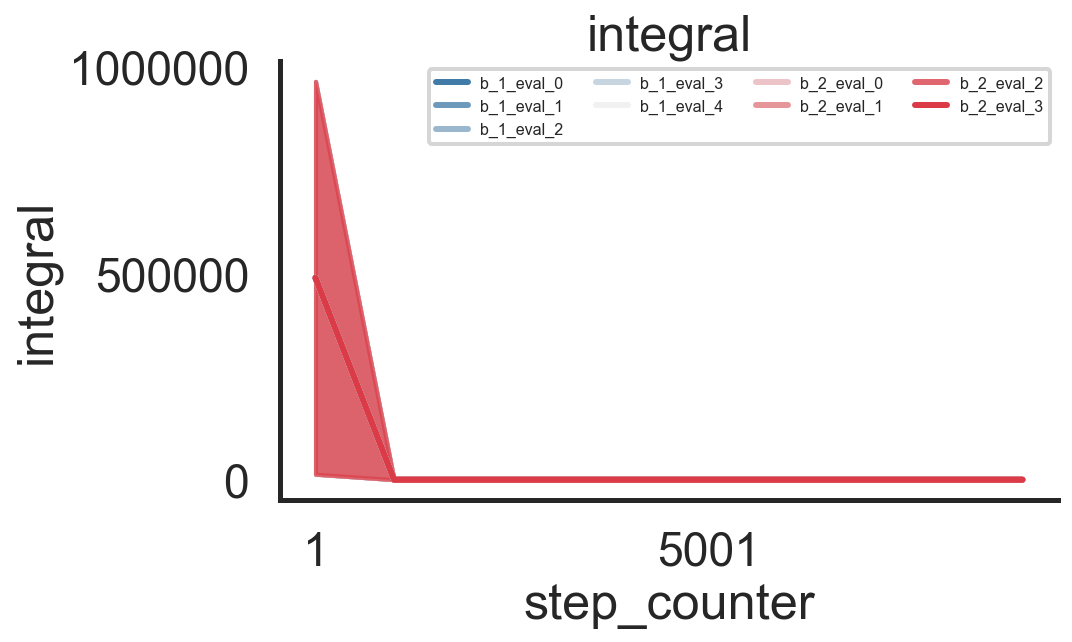

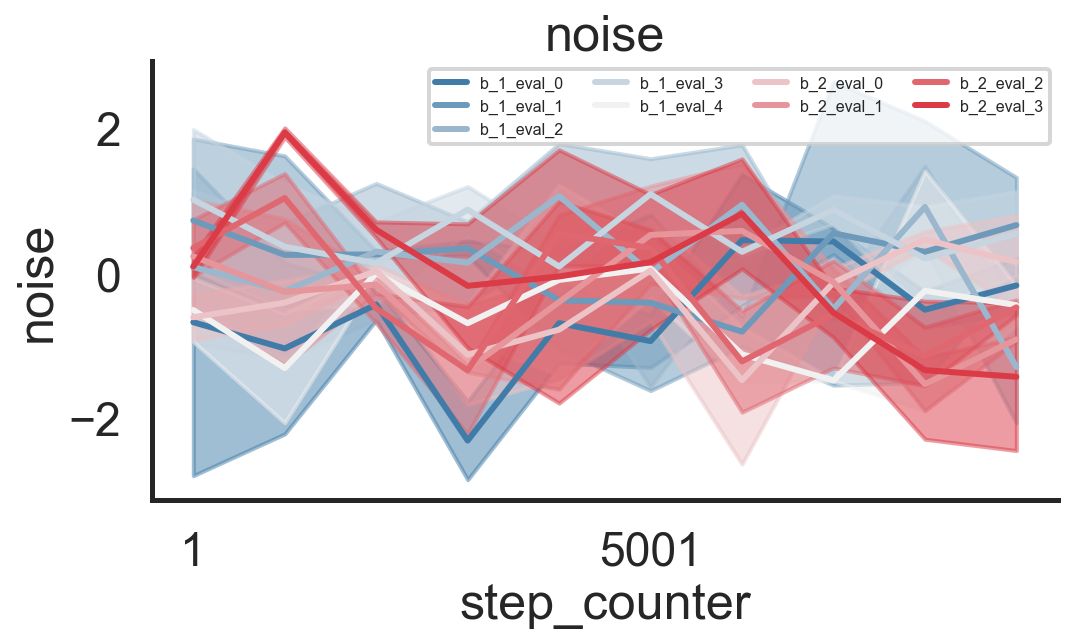

In [62]:
reporter = auto_generate_reports(e_id)

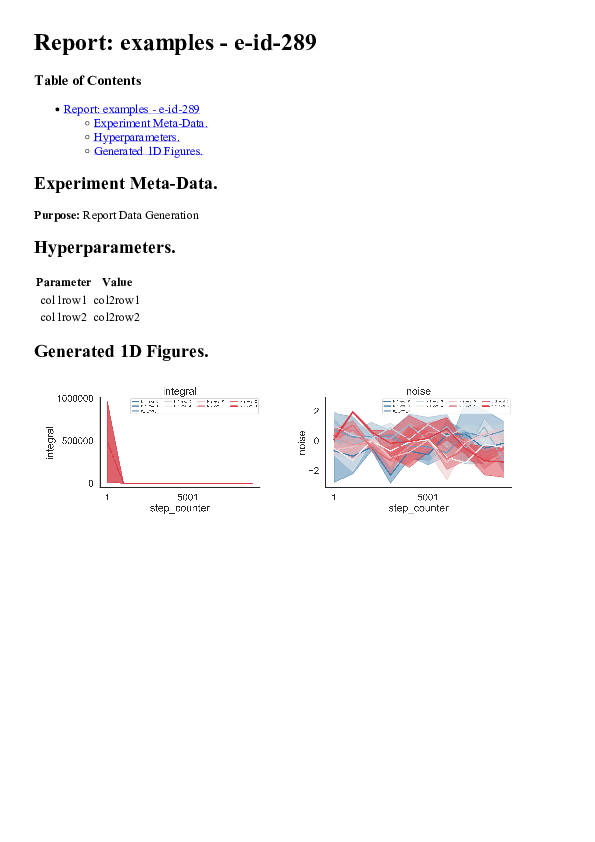

In [17]:
try:
    from wand.image import Image as WImage
except:
    !pip install Wand
    from wand.image import Image as WImage
img = WImage(filename=reporter.pdf_report_fname)
img